# Persian Ezafe Recognition 
#### Niloufar Babaahmadi 610398103 Final Project

In [116]:
import pandas as pd
import numpy as np
from sklearn import *
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import XGBClassifier

Reading the input data.

In [78]:
df = pd.read_csv("updated_bijankhan_corpus.csv")

df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag
0,0,!هنری!,SUBJ,0
1,1,#,DELM,0
2,2,مسعود,N_SING_PR,1
3,3,شجاعی,N_SING_PR,1
4,4,طباطبایی,N_SING_PR,0


Since we are going to train models using this data, we have to transform the tag to numbers.

In [87]:
le = preprocessing.LabelEncoder()
df['pos_tag'] = le.fit_transform(df.pos_tag.values)

df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag
0,0,!هنری!,248,0,65,0
1,1,#,65,0,167,248
2,2,مسعود,167,1,167,65
3,3,شجاعی,167,1,167,167
4,4,طباطبایی,167,0,65,167


A little persian grammar lesson: Having ezafe depends on 3 main factors; The current word's part of speech, The next word's part of speech, The last word's part of speech. We will add the needed features to our data frame.

In [88]:
col = df['pos_tag'].tolist()
col.pop(0)
col.append(0)
df['next_tag'] = col
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag
0,0,!هنری!,248,0,65,0
1,1,#,65,0,167,248
2,2,مسعود,167,1,167,65
3,3,شجاعی,167,1,167,167
4,4,طباطبایی,167,0,65,167


In [89]:
col = df['pos_tag'].tolist()
col.pop()
col.insert(0, 0)
df['last_tag'] = col
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag
0,0,!هنری!,248,0,65,0
1,1,#,65,0,167,248
2,2,مسعود,167,1,167,65
3,3,شجاعی,167,1,167,167
4,4,طباطبایی,167,0,65,167


### Random Forest classification model 
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. However, There is an issue when implementing this model and that's the large amount of time that it takes to run compared to decision tree.

In [90]:
def Random_forest():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:]

    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred, average="binary"))

In [91]:
global X, y

X = df[['pos_tag']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.80501
precision: 0.5755098426939763
recall: 0.7921676958076048


In [92]:
X = df[['next_tag']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.80212
precision: 0.6701677710418723
recall: 0.38621221969450764


In [93]:
X = df[['last_tag']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.76493
precision: 0.548678781494162
recall: 0.25389990250243744


In [94]:
X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.94606
precision: 0.8754296875
recall: 0.9104241143971401


### Decision Tree
A decision tree is a flowchart-like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class labe

In [95]:
def decision_tree():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:] 

    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred, average="binary"))

In [96]:
global X, y

X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.94594
precision: 0.8753419304415787
recall: 0.9099772505687358


In [97]:
global X, y

X = df[['pos_tag']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.80501
precision: 0.5755098426939763
recall: 0.7921676958076048


In [98]:
global X, y

X = df[['last_tag']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.76493
precision: 0.548678781494162
recall: 0.25389990250243744


In [99]:
global X, y

X = df[['next_tag']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.80212
precision: 0.6701677710418723
recall: 0.38621221969450764


### Naive Bayes
In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. 
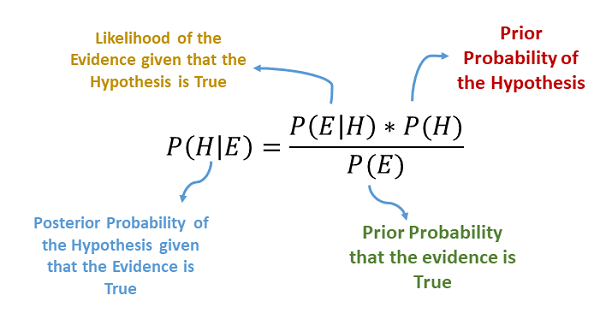

In [100]:
def naive_bayes():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:] 

    clf = GaussianNB()
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred, average="binary"))

In [101]:
X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

naive_bayes()

Accuracy: 0.72026
precision: 0.45192417821555375
recall: 0.6411683457913552


### Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.
Here, we have Ezafe which is either 0 or 1 and so Logistic Regression could give us our desired results.

In [102]:
def logistic_regression():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:] 

    clf = LogisticRegression()
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred, average="binary"))

In [103]:
X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

logistic_regression()

Accuracy: 0.74729
precision: 0.2770592239618788
recall: 0.016533961650958728


### MLP
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). 
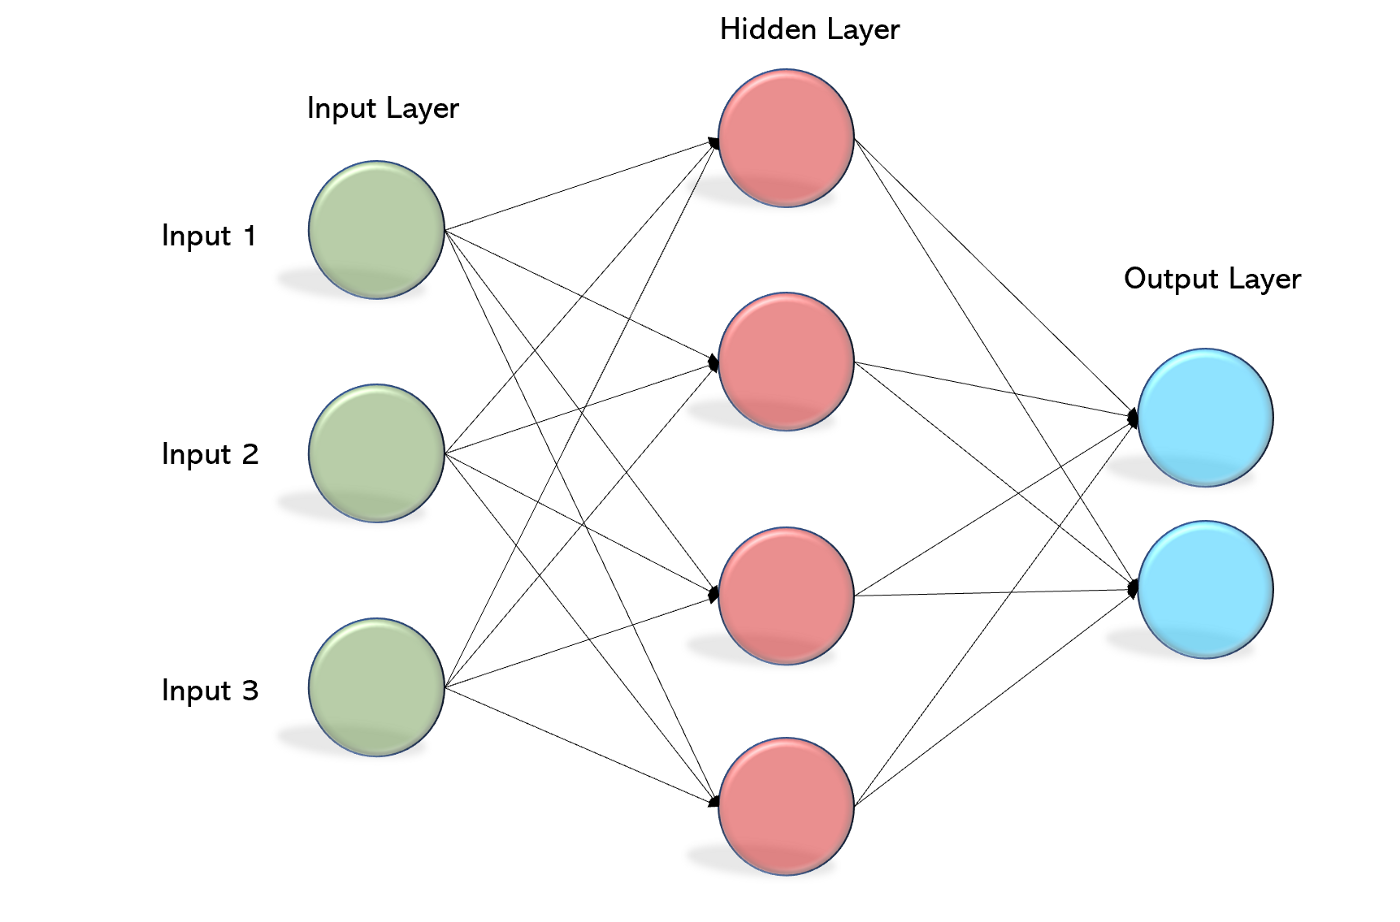

In [104]:
def MLP():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:]  

    
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
    clf.fit(X, y)

    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred, average=None, zero_division=1))
    print("recall:", recall_score(y_test, y_pred, average=None, zero_division=1))

In [105]:
global X, y

X = df[['pos_tag']]  
y = df['ezafe_tag'] 

MLP()

Accuracy: 0.75384
precision: [0.75384 1.     ]
recall: [1. 0.]


In [106]:
global X, y

X = df[['last_tag']]  
y = df['ezafe_tag'] 

MLP()

Accuracy: 0.75384
precision: [0.75384 1.     ]
recall: [1. 0.]


In [107]:
global X, y

X = df[['next_tag']]  
y = df['ezafe_tag'] 

MLP()

Accuracy: 0.75384
precision: [0.75384 1.     ]
recall: [1. 0.]


In [108]:
global X, y

X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

MLP()

Accuracy: 0.75384
precision: [0.75384 1.     ]
recall: [1. 0.]


### Gradient boosting classifiers
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.

In [117]:
def gradient_boosting_classifier():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:]  
 

    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred, average="binary"))

In [118]:
global X, y

X = df[['pos_tag']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.79117
precision: 0.5624268370179605
recall: 0.683132921676958


In [119]:
global X, y

X = df[['next_tag']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.80076
precision: 0.6828526890101325
recall: 0.3559067273318167


In [120]:
global X, y

X = df[['last_tag']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.76368
precision: 0.5446460980036297
recall: 0.24382515437114072


In [121]:
global X, y

X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.92612
precision: 0.8446702944942381
recall: 0.8575723106922327


### XGboost
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [124]:
def XGboost():
    
    global X, y
    
    X_train = X[:-100000]
    X_test = X[-100000:]
    y_train = y[:-100000]
    y_test = y[-100000:]  
 

    clf = XGBClassifier()
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred))

In [125]:
global X, y

X = df[['pos_tag']]  
y = df['ezafe_tag'] 

XGboost()

[17:21:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.80501
precision: 0.5755098426939763
recall: 0.7921676958076048


In [126]:
global X, y

X = df[['last_tag']]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:23:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.76492
precision: 0.5486391571553995
recall: 0.253859278518037


In [127]:
global X, y

X = df[['next_tag']]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.80214
precision: 0.6702382630762724
recall: 0.38625284367890805


In [128]:
global X, y

X = df[['last_tag','next_tag','pos_tag']]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.94494
precision: 0.8700906344410876
recall: 0.9125771855703607


Since my precesion did not get better despite trying different models, I decided to add more features; such as less important reasons to have Ezafe such as dependency on last/next 2 words.

In [109]:
col = df['next_tag'].tolist()
col.pop(0)
col.append(0)
df['next_tag2'] = col
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag,next_tag2
0,0,!هنری!,248,0,65,0,167
1,1,#,65,0,167,248,167
2,2,مسعود,167,1,167,65,167
3,3,شجاعی,167,1,167,167,65
4,4,طباطبایی,167,0,65,167,121


In [110]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.95719
precision: 0.9214857190233388
recall: 0.9030305492362691


In [111]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.95573
precision: 0.9208321173969234
recall: 0.8973025674358142


In [129]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.93755
precision: 0.8908889739988936
recall: 0.8504631134221644


In [130]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2']]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:30:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.95718
precision: 0.9186362513382196
recall: 0.9063210919727007


In [113]:
col = df['last_tag'].tolist()
col.pop()
col.insert(0, 0)
df['last_tag2'] = col
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag,next_tag2,last_tag2
0,0,!هنری!,248,0,65,0,167,0
1,1,#,65,0,167,248,167,0
2,2,مسعود,167,1,167,65,167,248
3,3,شجاعی,167,1,167,167,65,65
4,4,طباطبایی,167,0,65,167,121,167


In [114]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2']]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.9555
precision: 0.9174809539582643
recall: 0.9001868703282417


In [115]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2']]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.95088
precision: 0.912631931646842
recall: 0.8851966200844978


In [131]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2']]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.93755
precision: 0.8908889739988936
recall: 0.8504631134221644


In [132]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2']]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9572
precision: 0.9196450680973999
recall: 0.9052242443938902


In [154]:
def find_last1(pword):
    
    chars = "1234567890!@#$%^&*)(-_=+\|}{][;:/?>.<,"
    n = "0"
    
    if pword[-1] not in chars:
        
        return pword[-1]
    
    else:
        
        return n

In [155]:
def find_last2(pword):
    
    chars = "1234567890!@#$%^&*)(-_=+\|}{][;:/?>.<,"
    n = "0"
    
    if pword[-1] not in chars:
        
        return n
    
    else:
        
        return pword[-1]

In [156]:
df["eletter"] = df['token'].apply(find_last1)
df["eletter"] = le.fit_transform(df.eletter.values)
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag,next_tag2,last_tag2,eletter
0,0,!هنری!,248,0,65,0,167,0,2
1,1,#,65,0,167,248,167,0,2
2,2,مسعود,167,1,167,65,167,248,70
3,3,شجاعی,167,1,167,167,65,65,103
4,4,طباطبایی,167,0,65,167,121,167,103


In [158]:
df["emark"] = df['token'].apply(find_last2)
df["emark"] = le.fit_transform(df.emark.values)
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,next_tag,last_tag,next_tag2,last_tag2,eletter,emark
0,0,!هنری!,248,0,65,0,167,0,2,0
1,1,#,65,0,167,248,167,0,2,1
2,2,مسعود,167,1,167,65,167,248,70,13
3,3,شجاعی,167,1,167,167,65,65,103,13
4,4,طباطبایی,167,0,65,167,121,167,103,13


In [159]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2', "eletter", "emark"]]  
y = df['ezafe_tag'] 

Random_forest()

Accuracy: 0.96958
precision: 0.9345041488761782
recall: 0.9424764380890478


In [164]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2', "eletter", "emark"]]  
y = df['ezafe_tag'] 

decision_tree()

Accuracy: 0.96241
precision: 0.9294568216447721
recall: 0.916883327916802


In [161]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2', "eletter", "emark"]]  
y = df['ezafe_tag'] 

gradient_boosting_classifier()

Accuracy: 0.93788
precision: 0.8840247057841583
recall: 0.8605378615534611


In [162]:
global X, y

X = df[['last_tag','next_tag','pos_tag', 'next_tag2','last_tag2', "eletter", "emark"]]  
y = df['ezafe_tag'] 

XGboost()

/home/niloufar/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:24:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.97096
precision: 0.9321311997452432
recall: 0.9512918427039324
